##Inspecting

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/FlorianMuehlbauer24/Final-Project-Bart-Flo/main/hotel_booking_data_cleaned.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
unique_values = df['is_canceled'].unique()
print(unique_values)

[0 1]


In [4]:
nan_count = df['is_canceled'].isna().sum()
print("Number of NaN values in the column:", nan_count)

Number of NaN values in the column: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape


(119390, 32)

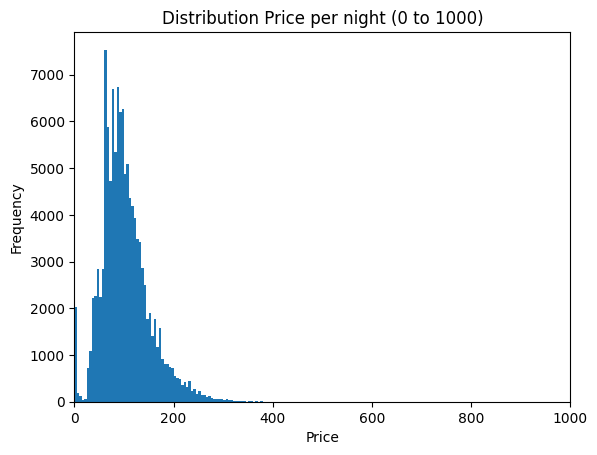

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['adr'], bins=100, range=(0, 500))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution Price per night (0 to 1000)')
plt.xlim(0, 1000)
plt.show()

##Data Wrangling

In [8]:
# Amending dates in reservation_status_date for ML. extracing weekday
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
df['weekday_reservation'] = df['reservation_status_date'].dt.day_name()

<ipython-input-8-17867c39d23b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')


In [9]:
# Replacing nans in columns children with median
df['children'] = df['children'].fillna(df['children'].median())
nan_count = df['children'].isna().sum()
print(nan_count)

0


In [10]:
df['children'] = df['children'].astype(int)

In [11]:
#Columns to pop: company, agent,reservation_status_date
df.pop('company')
df.pop('agent')
df.pop('reservation_status_date')
# df.pop('reservation_status') # only relevant for ML

0        2015-01-07
1        2015-01-07
2        2015-02-07
3        2015-02-07
4        2015-03-07
            ...    
119385   2017-06-09
119386   2017-07-09
119387   2017-07-09
119388   2017-07-09
119389   2017-07-09
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [12]:
# Rename column "adr"
df.rename(columns={'adr': 'average_daily_rate'}, inplace=True)

In [13]:
df = df.dropna(subset=['country']).reset_index(drop=True)

In [14]:
df = df[df['is_canceled'] == 1]

In [15]:
# download csv for eda
df.to_csv('df_eda_canceled.csv', index=False)

In [16]:
df.shape

(44157, 30)

##Data Transformation

In [18]:
# Numerical DF
numerical_columns = ['lead_time', 'adults', 'children', 'average_daily_rate',
                     'total_of_special_requests', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes',
                     'days_in_waiting_list', 'required_car_parking_spaces']

numerical_df = df[numerical_columns]
numerical_df.shape

(44157, 12)

In [19]:
numerical_df.to_csv('df_numerical_ml.csv', index=False)

In [20]:
# Ordinal DF
ordinal_df = df[['meal','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','reserved_room_type', 'assigned_room_type', 'weekday_reservation']]

In [21]:
ordinal_df['meal'] = ordinal_df['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3, 'Undefined': 4})
ordinal_df['arrival_date_month'] = ordinal_df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
)
ordinal_df['reserved_room_type'] = ordinal_df['reserved_room_type'].map({chr(i): i - ord('A') + 1 for i in range(ord('A'), ord('P')+1)})
ordinal_df['assigned_room_type'] = ordinal_df['assigned_room_type'].map({chr(i): i - ord('A') + 1 for i in range(ord('A'), ord('P')+1)})
ordinal_df['weekday_reservation'] = ordinal_df['weekday_reservation'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})


<ipython-input-21-56005279aa69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['meal'] = ordinal_df['meal'].map({'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3, 'Undefined': 4})
<ipython-input-21-56005279aa69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['arrival_date_month'] = ordinal_df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
<ipython-input-21-

In [22]:
ordinal_df

,meal,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reserved_room_type,assigned_room_type,weekday_reservation
8,1,2015,7,27,1,1,1,5
9,2,2015,7,27,1,4,4,3
10,1,2015,7,27,1,5,5,2
27,1,2015,7,27,1,5,5,4
31,1,2015,7,27,1,5,5,5
...,...,...,...,...,...,...,...,...
109792,1,2017,4,17,25,4,11,2
110867,1,2017,6,23,5,1,1,6
111436,1,2017,5,22,31,1,1,3
111437,1,2017,7,29,17,1,4,1


In [23]:
# Nominal DF
nominal_df = df[['hotel', 'is_canceled', 'country', 'market_segment', 'distribution_channel','is_repeated_guest','deposit_type','customer_type']]

In [ ]:
nominal_df.head()

In [ ]:
nominal_df = pd.get_dummies(nominal_df)

In [ ]:
nominal_df

,is_canceled,is_repeated_guest,hotel_City Hotel,hotel_Resort Hotel,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
8,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
9,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
10,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
27,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
31,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109792,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
110867,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
111436,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
111437,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
nominal_df

,is_canceled,is_repeated_guest,hotel_City Hotel,hotel_Resort Hotel,country_ABW,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
119386,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
119387,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
119388,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
# Concat Dfs
df_combined = pd.concat([ordinal_df, numerical_df, nominal_df], axis=1)

In [ ]:
df_combined.head()

,meal,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reserved_room_type,assigned_room_type,weekday_reservation,lead_time,adults,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,2015,7,27,1,3,3,3,342,2,...,0,0,0,1,0,0,0,0,1,0
1,1,2015,7,27,1,3,3,3,737,2,...,0,0,0,1,0,0,0,0,1,0
2,1,2015,7,27,1,1,3,6,7,1,...,0,0,0,1,0,0,0,0,1,0
3,1,2015,7,27,1,1,1,6,13,1,...,0,0,0,1,0,0,0,0,1,0
4,1,2015,7,27,1,1,1,6,14,2,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 221 entries, meal to customer_type_Transient-Party
dtypes: float64(1), int64(21), uint8(199)
memory usage: 42.7 MB


In [ ]:
df_combined.shape

(44157, 171)

In [ ]:
df_combined['is_canceled'].unique()

array([1])

In [ ]:
df_combined['is_canceled'].value_counts()

1    44157
Name: is_canceled, dtype: int64

In [ ]:
df_combined.to_csv('df_ml_canceled.csv', index=False)